In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_netflix = pd.read_csv("netflix_titles.csv")

In [3]:
df_hulu = pd.read_csv("hulu_titles.csv")

In [4]:
df_hulu.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

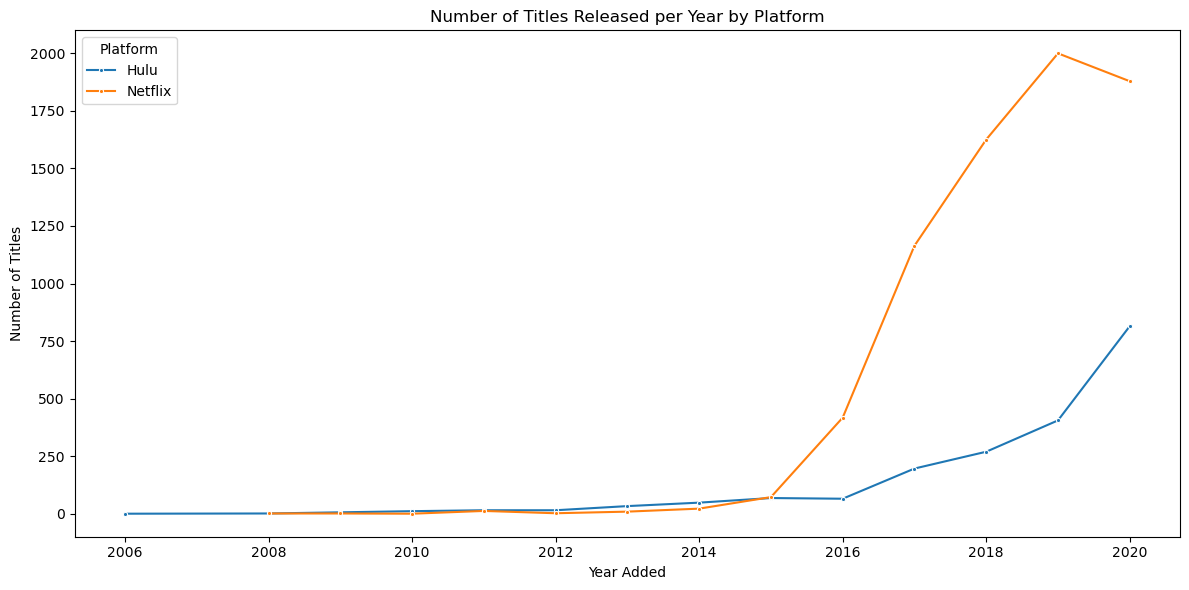

In [5]:
# Label each DataFrame with the platform name
df_netflix['platform'] = 'Netflix'
df_hulu['platform'] = 'Hulu'
df_netflix['year_added'] = pd.to_datetime(df_netflix['date_added'], errors='coerce').dt.year
df_hulu['year_added'] = pd.to_datetime(df_hulu['date_added'], errors='coerce').dt.year


# Combine the datasets
df_all = pd.concat([df_netflix, df_hulu],ignore_index = True)

# Group by release year and platform to count number of titles
titles_per_year = df_all.groupby(['year_added', 'platform']).size().reset_index(name='count')

# Optional: Sort by year (if not already sorted)
titles_per_year = titles_per_year.sort_values('year_added')
titles_per_year = titles_per_year[titles_per_year['year_added']<= 2020]

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=titles_per_year, x='year_added', y='count', hue='platform', marker='.')

# Customize the plot
plt.title('Number of Titles Released per Year by Platform')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Platform')
plt.grid(False)
plt.tight_layout()
plt.show()


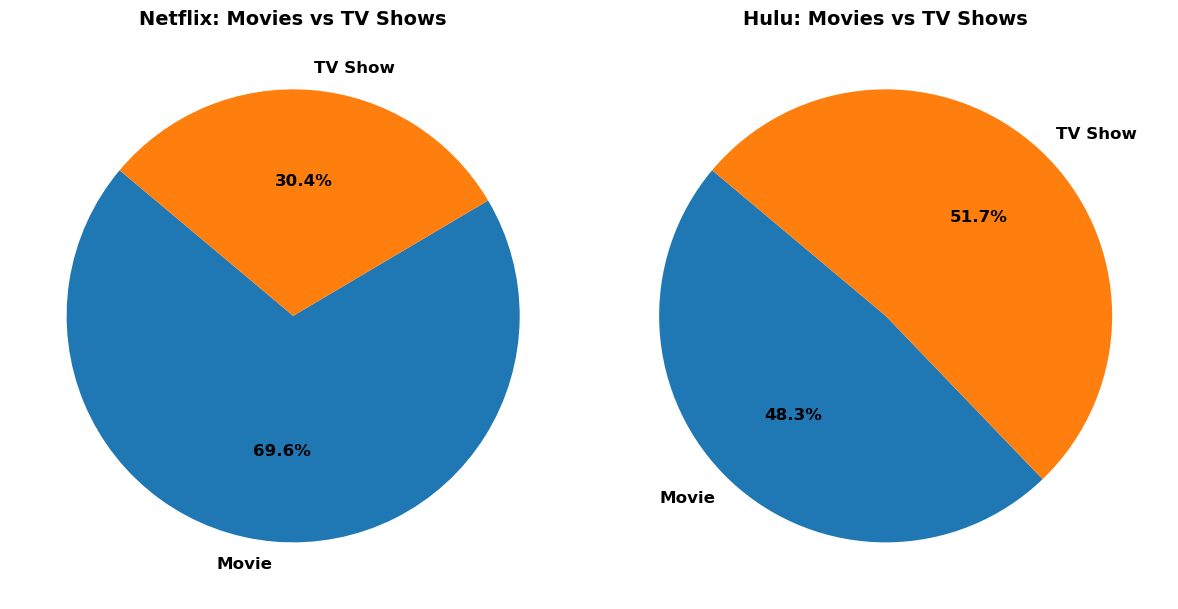

In [6]:
# Define a consistent color mapping
type_colors = {'Movie': '#1f77b4', 'TV Show': '#ff7f0e'}  # Blue for Movie, Orange for TV Show

# Ensure both counts are in the same order
type_order = ['Movie', 'TV Show']
type_counts_netflix = df_netflix['type'].value_counts().reindex(type_order)
type_counts_hulu = df_hulu['type'].value_counts().reindex(type_order)

# Create the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Netflix pie
axes[0].pie(
    type_counts_netflix,
    labels=type_counts_netflix.index,
    colors=[type_colors[t] for t in type_counts_netflix.index],
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
axes[0].set_title('Netflix: Movies vs TV Shows', fontsize=14, fontweight='bold')

# Hulu pie
axes[1].pie(
    type_counts_hulu,
    labels=type_counts_hulu.index,
    colors=[type_colors[t] for t in type_counts_hulu.index],
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
axes[1].set_title('Hulu: Movies vs TV Shows', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [7]:
df_all.listed_in.nunique()

955

In [24]:
genre_mapping = {
    "Documentary": ["documentary",'documentaries', "docuseries", "docudrama", "docu-series"],
    "Comedy": ["comedy", "comedies", "sitcom"],
    "Romance": ["romance", "romantic", "romantic comedy"],
    "Animation":["adult animation","animation"],
    "Thriller": ["thriller", "psychological", "suspense"],
    "Action": ["action", "martial arts", "superhero", "adventure"],
    "Horror": ["horror", "slasher", "supernatural horror"],
    "Sci-fi/fantasy": ["sci-fi", "science fiction", "fantasy", "sci fi", "magic", "supernatural"],
    "Anime": ["anime", "japanese animation"],
    "Reality TV": ["reality tv","reality"],
    "Children & Family":["children & family movies","kids' tv","kids","family"],
    "Musical":['music & musicals',"music","musicals","musical"],
    "Crime":["crime tv shows","crime"],
    "Drama": ["drama", "dramas"],
    "Others": []  # fallback
}
def map_genre(category_string):
    category_string = category_string.lower()
    for main_genre, keywords in genre_mapping.items():
        for keyword in keywords:
            if keyword in category_string:
                return main_genre
    return "others"


In [25]:
df_all['primary_genre'] = df_all['listed_in'].apply(map_genre)

In [26]:
df_all[df_all['primary_genre']=='others'].listed_in.unique()

array(['TV Shows', 'Movies',
       'British TV Shows, Classic & Cult TV, International TV Shows',
       'International Movies', 'Sports Movies',
       'International Movies, Sports Movies', 'International TV Shows',
       'Independent Movies', 'News', 'Sports', 'Health & Wellness, News',
       'Cooking & Food, Lifestyle & Culture', 'Cartoons',
       'Lifestyle & Culture', 'News, Science & Technology',
       'Lifestyle & Culture, News', 'History, News',
       'Black Stories, LGBTQ+, Lifestyle & Culture', 'Latino, Sports',
       'History', 'Game Shows', 'Science & Technology', 'Classics, News',
       'Cooking & Food', 'Latino',
       'Cooking & Food, International, Lifestyle & Culture'], dtype=object)

In [27]:
df_all[df_all['primary_genre']=='others'].listed_in.nunique()

26

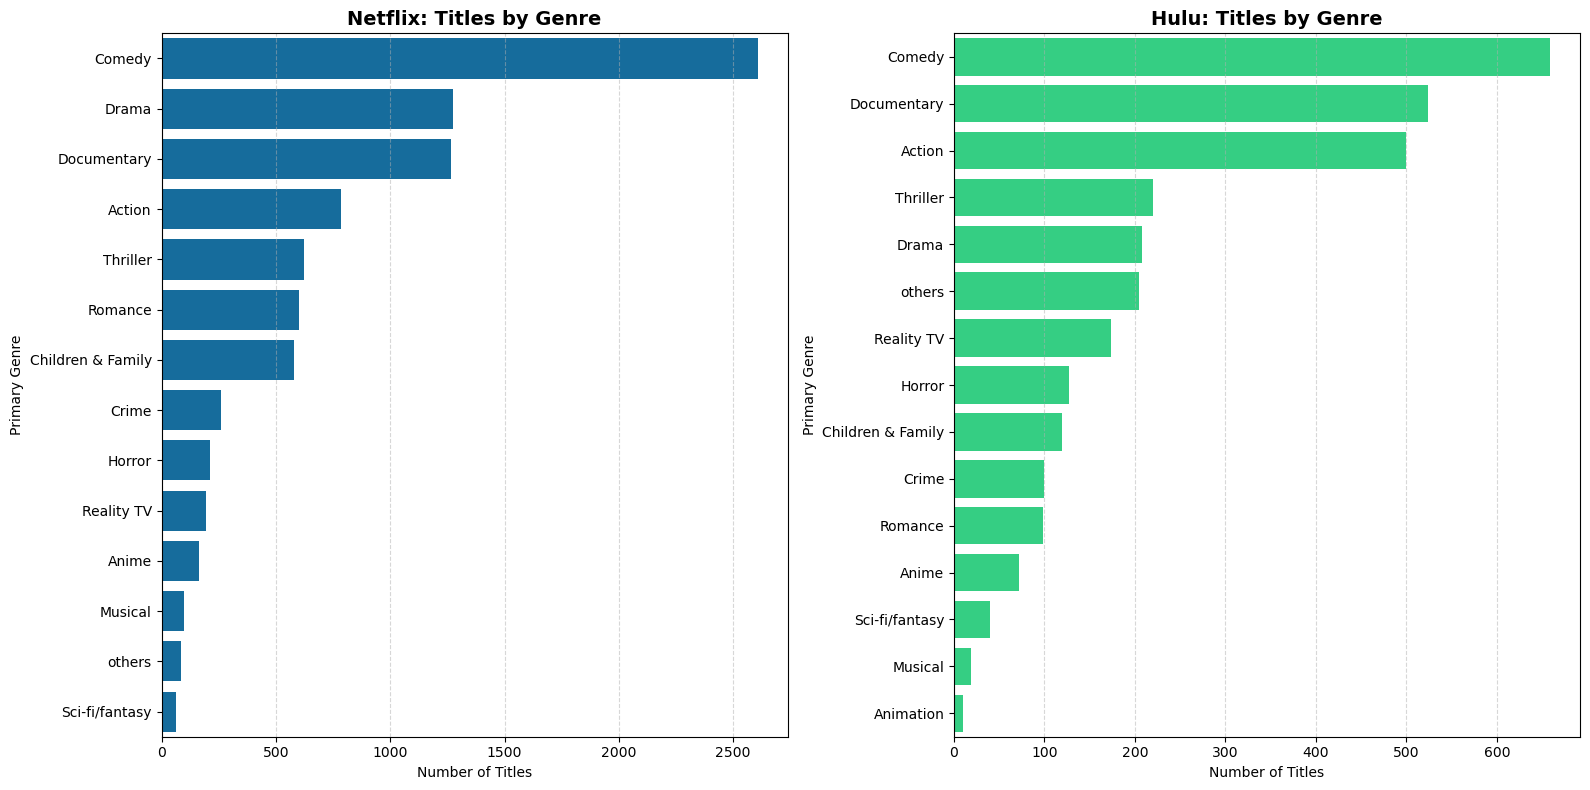

In [28]:
# Get genre counts separately and sort in descending order
netflix_genres = (
    df_all[df_all['platform'] == 'Netflix']['primary_genre']
    .value_counts()
    .sort_values(ascending=False)
)

hulu_genres = (
    df_all[df_all['platform'] == 'Hulu']['primary_genre']
    .value_counts()
    .sort_values(ascending=False)
)

# Create side-by-side bar plots WITHOUT shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Netflix plot
sns.barplot(
    x=netflix_genres.values,
    y=netflix_genres.index,
    ax=axes[0],
    color= '#0072B2'
)
axes[0].set_title('Netflix: Titles by Genre', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('Primary Genre')
axes[0].grid(True, axis='x', linestyle='--', alpha=0.5)

# Hulu plot
sns.barplot(
    x=hulu_genres.values,
    y=hulu_genres.index,
    ax=axes[1],
    color='#1ce783'
)
axes[1].set_title('Hulu: Titles by Genre', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('Primary Genre')
axes[1].grid(True, axis='x', linestyle='--', alpha=0.5)
plt.savefig("bar_hulu_vs_netflix.png")  # or .jpg, .pdf, etc.
plt.tight_layout()
plt.show()


In [13]:
# pip install wordcloud


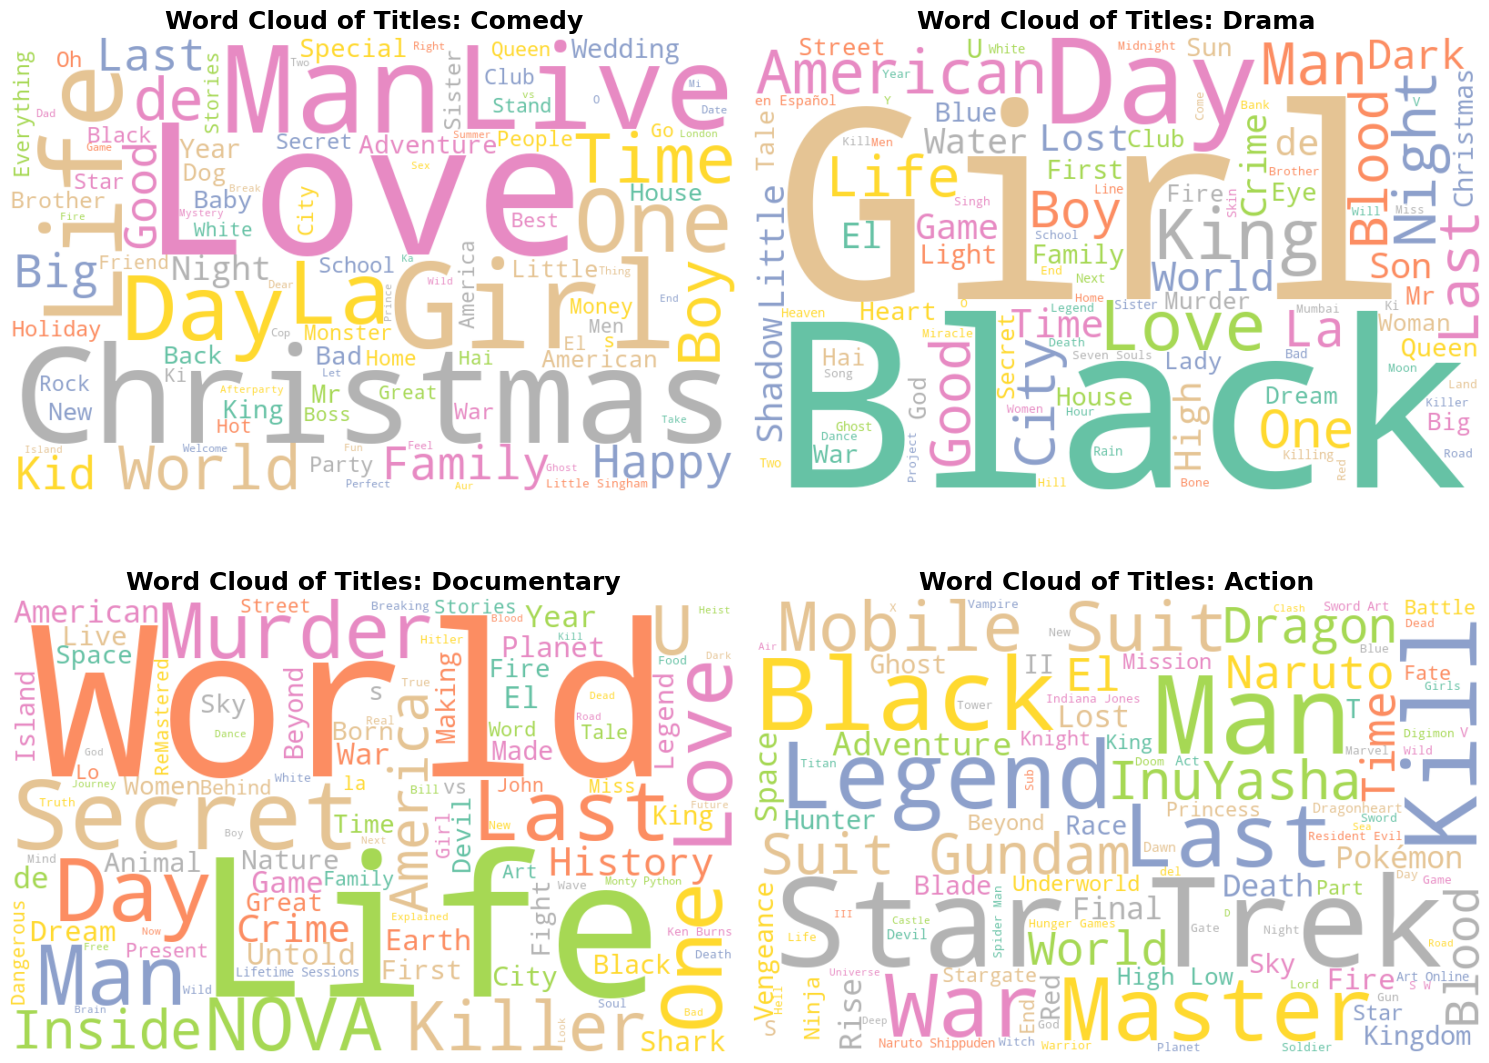

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Use 'title' column as text source
text_column = 'title'

# Define genres you're interested in
genres = ['Comedy', 'Drama', 'Documentary','Action']

# Extend default stopwords with genre-specific and obvious words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'movie', 'show', 'comedy', 'drama', 'romantic', 'series',
    'film', 'tv', 'netflix', 'hulu', 'the', 'a', 'an','story','documentary'
])

plt.figure(figsize=(15, 12))

for i, genre in enumerate(genres, 1):
    genre_text = df_all[df_all['primary_genre'] == genre][text_column].dropna().str.cat(sep=' ')
    
    wordcloud = WordCloud(
        stopwords=custom_stopwords,
        background_color='white',
        colormap='Set2',
        max_words=100,
        width=800,
        height=500
    ).generate(genre_text)
    
    # Save the word cloud as an image
    filename = f'wordcloud_{genre.lower()}.png'
    wordcloud.to_file(filename)
    
    # Display in subplot
    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Titles: {genre}', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()


In [15]:
df_all.groupby('rating')['title'].count().reset_index().sort_values('title',ascending = False).head(50)

,rating,title
87,TV-MA,3598
85,TV-14,2851
88,TV-PG,1184
84,R,1144
83,PG-13,653
82,PG,392
90,TV-Y7,380
86,TV-G,368
89,TV-Y,338
81,NR,81


In [16]:
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix,2019.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflix,2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix,2020.0


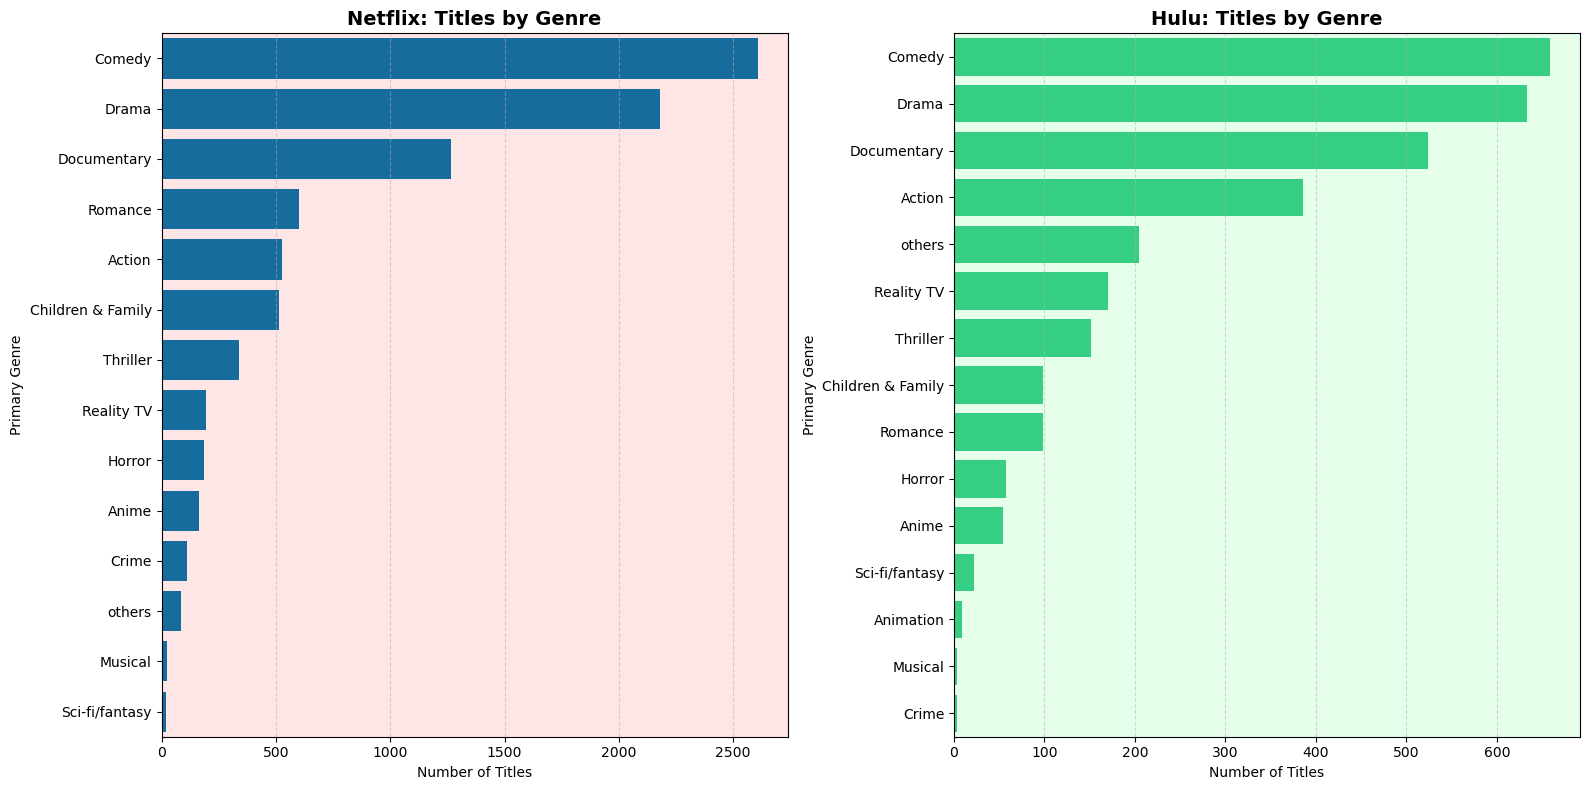

In [17]:
# Get genre counts separately and sort in descending order
netflix_genres = (
    df_all[df_all['platform'] == 'Netflix']['primary_genre']
    .value_counts()
    .sort_values(ascending=False)
)

hulu_genres = (
    df_all[df_all['platform'] == 'Hulu']['primary_genre']
    .value_counts()
    .sort_values(ascending=False)
)

# Create side-by-side bar plots WITHOUT shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Netflix plot
sns.barplot(
    x=netflix_genres.values,
    y=netflix_genres.index,
    ax=axes[0],
    color='#0072B2'
)
axes[0].set_title('Netflix: Titles by Genre', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('Primary Genre')
axes[0].grid(True, axis='x', linestyle='--', alpha=0.5)
axes[0].set_facecolor('#ffe6e6')  # Light red background

# Hulu plot
sns.barplot(
    x=hulu_genres.values,
    y=hulu_genres.index,
    ax=axes[1],
    color='#1ce783'
)
axes[1].set_title('Hulu: Titles by Genre', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('Primary Genre')
axes[1].grid(True, axis='x', linestyle='--', alpha=0.5)
axes[1].set_facecolor('#e6ffea')  # Light green background

plt.tight_layout()
plt.savefig("bar_hulu_vs_netflix.png")
plt.show()



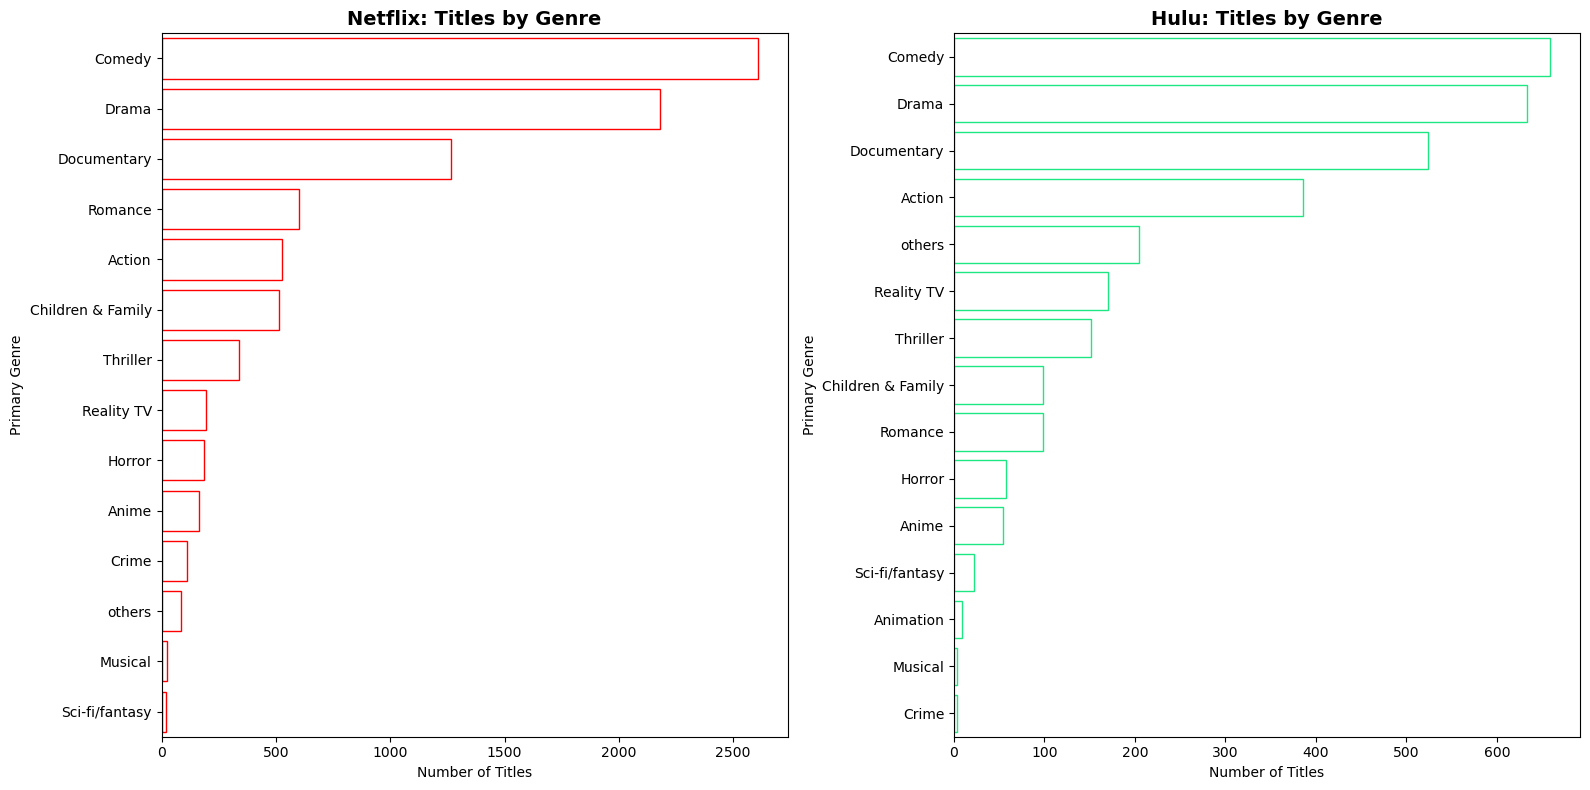

In [18]:
# Get genre counts separately and sort in descending order
netflix_genres = (
    df_all[df_all['platform'] == 'Netflix']['primary_genre']
    .value_counts()
    .sort_values(ascending=False)
)

hulu_genres = (
    df_all[df_all['platform'] == 'Hulu']['primary_genre']
    .value_counts()
    .sort_values(ascending=False)
)

# Create side-by-side bar plots WITHOUT shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
fig.patch.set_facecolor('white')  # Set the figure background to white

# Netflix plot
sns.barplot(
    x=netflix_genres.values,
    y=netflix_genres.index,
    ax=axes[0],
    color='white',  # White bars
    edgecolor='red'  # Blue outline for bars
)
axes[0].set_title('Netflix: Titles by Genre', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('Primary Genre')
axes[0].set_facecolor('white')  # White background for subplot
axes[0].grid(False)  # Remove grid lines

# Hulu plot
sns.barplot(
    x=hulu_genres.values,
    y=hulu_genres.index,
    ax=axes[1],
    color='white',  # White bars
    edgecolor='#1ce783'  # Green outline for bars
)
axes[1].set_title('Hulu: Titles by Genre', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('Primary Genre')
axes[1].set_facecolor('white')  # White background for subplot
axes[1].grid(False)  # Remove grid lines

plt.tight_layout()
plt.savefig("bar_hulu_vs_netflix_whitebg_nogrid.png")
plt.show()


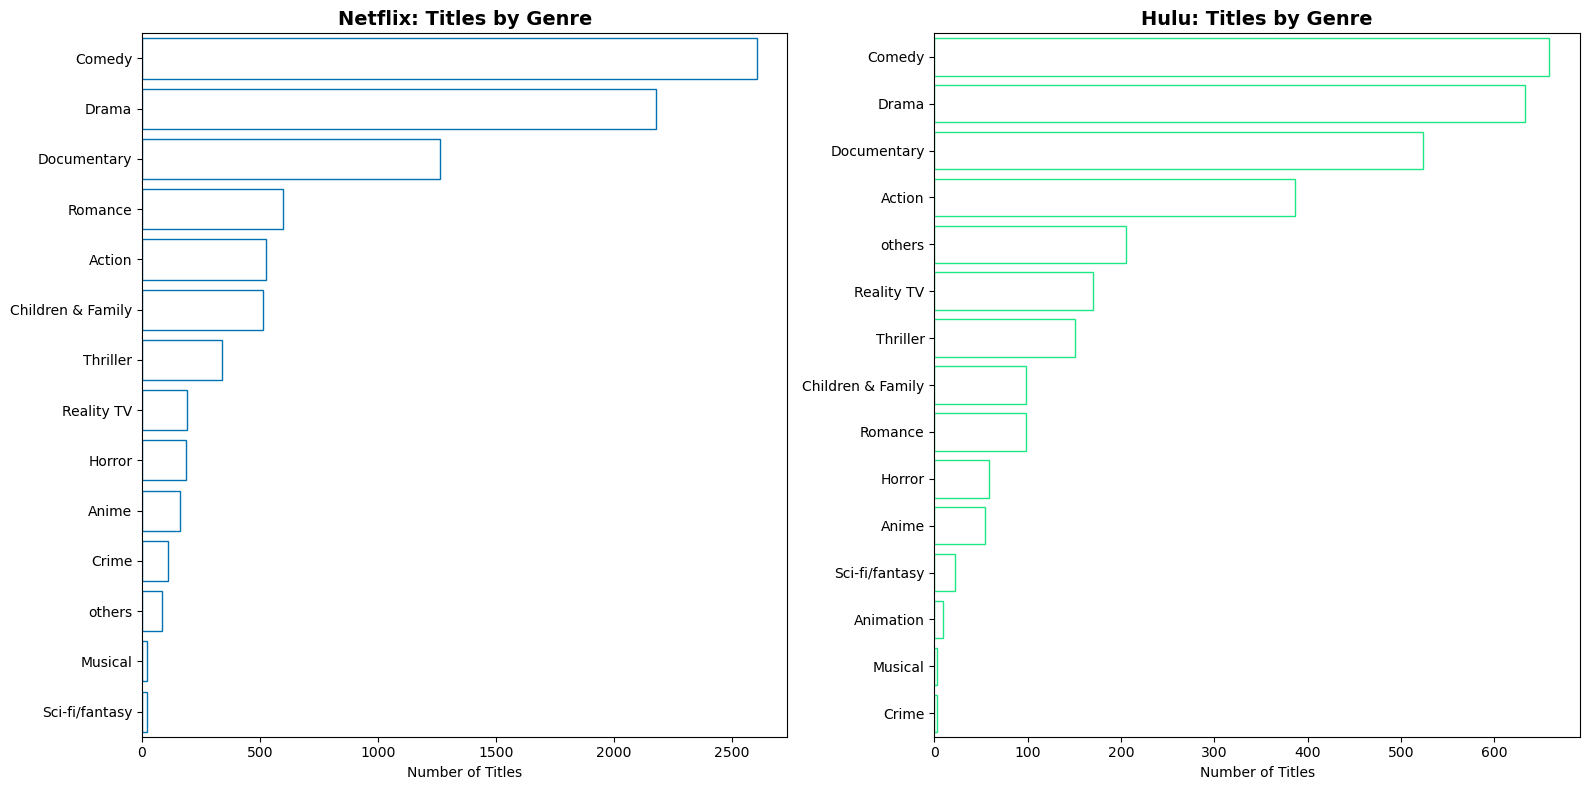

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get genre counts separately and sort in descending order
netflix_genres = (
    df_all[df_all['platform'] == 'Netflix']['primary_genre']
    .value_counts()
    .sort_values(ascending=False)
)

hulu_genres = (
    df_all[df_all['platform'] == 'Hulu']['primary_genre']
    .value_counts()
    .sort_values(ascending=False)
)

# Create side-by-side bar plots WITHOUT shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Netflix plot
sns.barplot(
    x=netflix_genres.values,
    y=netflix_genres.index,
    ax=axes[0],
    color='white',              # White bars
    edgecolor='#0072B2'         # Blue outline
)
axes[0].set_title('Netflix: Titles by Genre', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('')         # Hide y-axis label
axes[0].set_facecolor('white') # White background
axes[0].grid(False)            # Remove grid lines

# Hulu plot
sns.barplot(
    x=hulu_genres.values,
    y=hulu_genres.index,
    ax=axes[1],
    color='white',              # White bars
    edgecolor='#1ce783'         # Green outline
)
axes[1].set_title('Hulu: Titles by Genre', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('')         # Hide y-axis label
axes[1].set_facecolor('white') # White background
axes[1].grid(False)            # Remove grid lines

plt.tight_layout()
plt.savefig("bar_hulu_vs_netflix_whitebars_clean.png")
plt.show()


In [20]:
df_all

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,year_added,primary_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,2021.0,Documentary
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,2021.0,Drama
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,2021.0,Action
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,2021.0,Documentary
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,2021.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...,Hulu,NaN,Action
11876,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...,Hulu,NaN,Action
11877,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...,Hulu,NaN,Horror
11878,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,Hulu,NaN,Thriller


In [22]:
df_all.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'platform', 'year_added', 'primary_genre'],
      dtype='object')

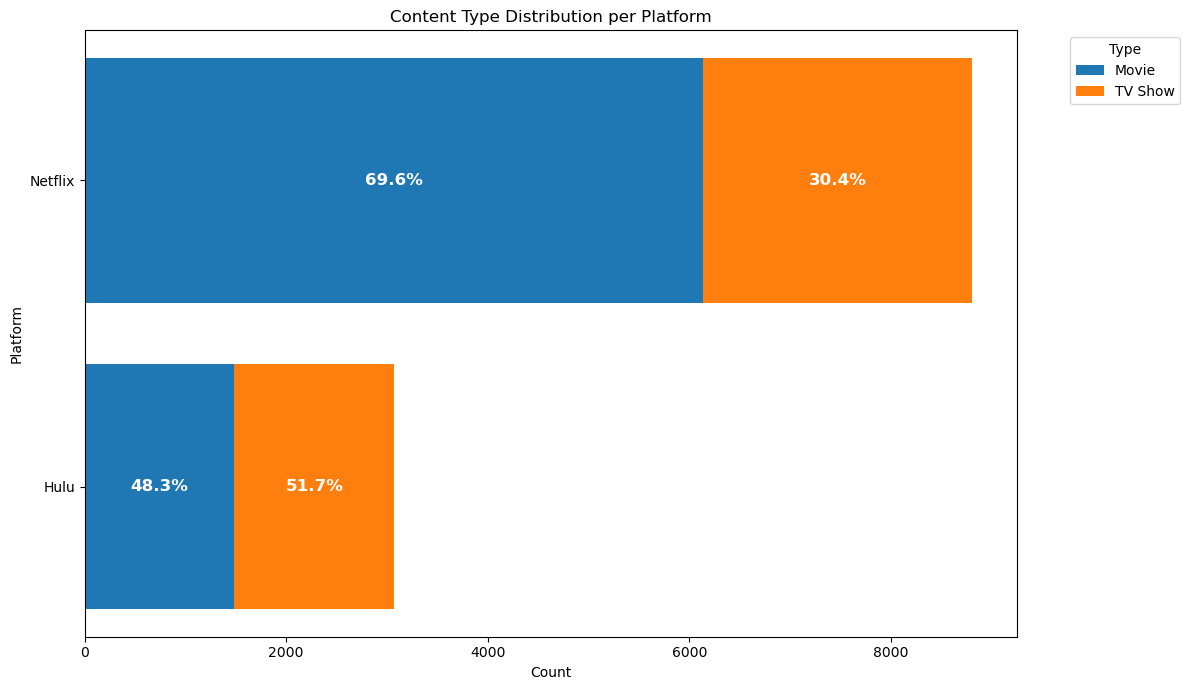

In [31]:
# Count number of shows by platform and type
counts = df_all.groupby(['platform', 'type']).size().unstack(fill_value=0)

platforms = counts.index
types = counts.columns

plt.figure(figsize=(12, 7))

bottom = pd.Series([0]*len(platforms), index=platforms)
palette = sns.color_palette("tab10", n_colors=len(types))

# Calculate total per platform for percentage calculation
totals = counts.sum(axis=1)

for i, t in enumerate(types):
    values = counts[t]
    plt.barh(platforms, values, left=bottom, color=palette[i], label=t)
    
    for platform in platforms:
        val = values[platform]
        if val > 0:
            pct = val / totals[platform] * 100
            xpos = bottom[platform] + val / 2
            plt.text(xpos, platform, f'{pct:.1f}%', 
                     va='center', ha='center', 
                     color='white', fontsize=12, fontweight='bold')
    
    bottom += values

plt.xlabel('Count')
plt.ylabel('Platform')
plt.title('Content Type Distribution per Platform')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("stacked_bar.png")
plt.show()


/var/folders/b8/6bmlzlrd6x30rlzmygjzjy9r0000gn/T/ipykernel_14047/374516742.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette="YlGnBu")


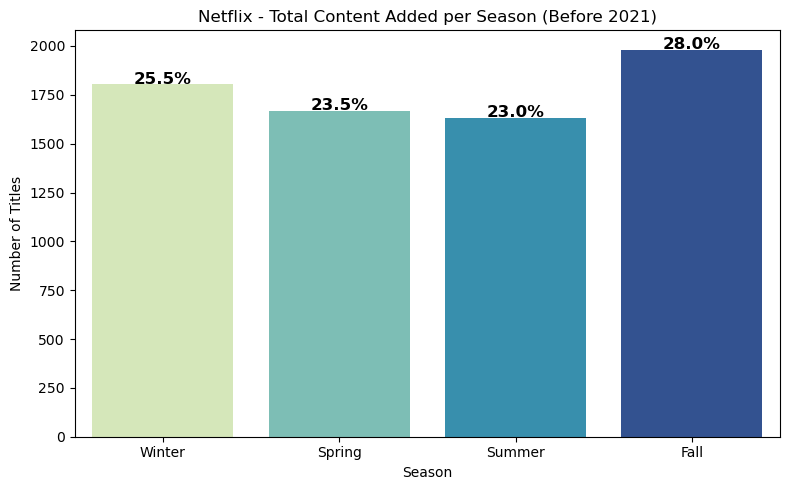

/var/folders/b8/6bmlzlrd6x30rlzmygjzjy9r0000gn/T/ipykernel_14047/374516742.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette="YlGnBu")


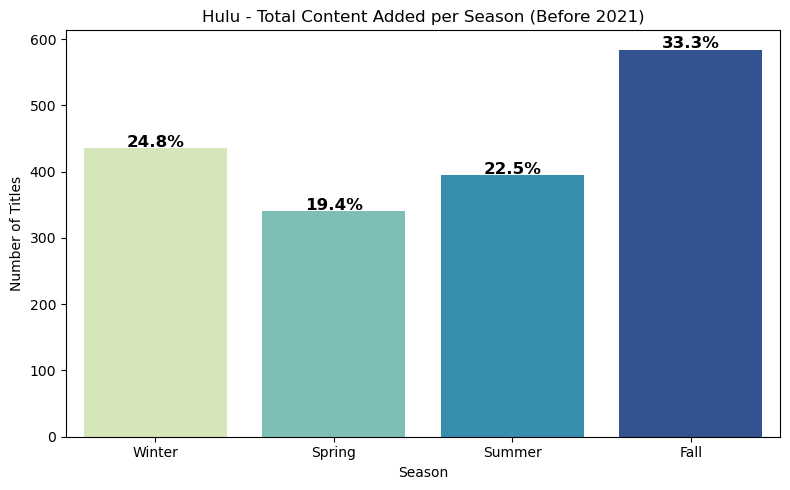

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use df_clean filtered before 2021 as before
df_clean = df_clean[df_clean['year_added']<2021]
# Re-map month to season if not already done
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_clean['season'] = df_clean['month'].apply(get_season)

# Define order for seasons
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

def plot_season_bar(platform_name):
    data = df_clean[df_clean['platform'] == platform_name]
    season_counts = data['season'].value_counts().reindex(season_order).fillna(0)
    total = season_counts.sum()
    percentages = (season_counts / total * 100).round(1)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=season_counts.index, y=season_counts.values, palette="YlGnBu")
    for i, (val, pct) in enumerate(zip(season_counts.values, percentages.values)):
        plt.text(i, val + 2, f'{pct}%', ha='center', fontsize=12, fontweight='bold')
    
    plt.title(f'{platform_name} - Total Content Added per Season (Before 2021)')
    plt.ylabel('Number of Titles')
    plt.xlabel('Season')
    plt.tight_layout()
    plt.show()

# Bar plot for Netflix
plot_season_bar('Netflix')

# Bar plot for Hulu
plot_season_bar('Hulu')


In [44]:
df_all[df_all['platform']=='Netflix'].country.value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [45]:
list1 = [1]